#1.**Introduction**

This project aims to develop a movie recommendation system. The system will utilize machine learning techniques to provide personalized movie suggestions based on user ratings and tags. The dataset used for this project is the MovieLens dataset, which contains ratings, tags, movie metadata and links.

#2.**Business** **Understanding**

##Objectives


1)   Personalised movie recommendations based on users history

2)   Investigate how the system performs for new users and new movies (analysis of the cold start problem)

3)   Build a deep learning based model that learns from user ratings and movie features to improve recommendation accuracy

4)   Optimize recommendation algorithms

5)   A dashboard to explore recommendations and engagement insights.






#3.**Data Undestanding**

##Libraries

In [ ]:
# Import neccesary Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

##Import Datasets

In [ ]:
# Load data
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
print(f"Movies: {movies.shape}")
print(f"Ratings: {ratings.shape}")
print(f"Tags: {tags.shape}")

Movies: (9742, 3)
Ratings: (100836, 4)
Tags: (3683, 4)


In [ ]:
print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [ ]:
print(ratings.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [ ]:
print(tags.head())

   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200


In [ ]:
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


In [ ]:
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


In [ ]:
print(tags.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
None


#4.**Data Cleaning**

##Correct Formats

In [ ]:
# Confirming the format of individual columns
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


##Confirming Mising values

In [ ]:
#Confirming whether there are missing values
print(movies.isnull().sum())
print(ratings.isnull().sum())
print(tags.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


##Merging the datasets

In [ ]:
# Merging the datasets into a common dataset
movie_data = pd.merge(movies, ratings, on='movieId', how='outer')
movie_data = pd.merge(movie_data, tags, on=['userId', 'movieId'], how='outer')
print(movie_data.head())

   movieId                        title  \
0        1             Toy Story (1995)   
1        3      Grumpier Old Men (1995)   
2        6                  Heat (1995)   
3       47  Seven (a.k.a. Se7en) (1995)   
4       50   Usual Suspects, The (1995)   

                                        genres  userId  rating  timestamp_x  \
0  Adventure|Animation|Children|Comedy|Fantasy     1.0     4.0  964982703.0   
1                               Comedy|Romance     1.0     4.0  964981247.0   
2                        Action|Crime|Thriller     1.0     4.0  964982224.0   
3                             Mystery|Thriller     1.0     5.0  964983815.0   
4                       Crime|Mystery|Thriller     1.0     5.0  964982931.0   

   tag  timestamp_y  
0  NaN          NaN  
1  NaN          NaN  
2  NaN          NaN  
3  NaN          NaN  
4  NaN          NaN  


## Checking Duplicates

In [ ]:
#Checking for duplicates in the movies_data.
#There were no duplicates in the dataset
movie_data.duplicated().sum()

np.int64(0)

##Exploratory Data Analysis(EDA)

In [ ]:
print(movie_data.shape)

(102902, 8)


In [ ]:
#Separate the timestamp column into date and year
movie_data['date'] = pd.to_datetime(movie_data['timestamp_x'], unit='s').dt.date
movie_data['year'] = pd.to_datetime(movie_data['timestamp_x'], unit='s').dt.year
movie_data.head()

,movieId,title,genres,userId,rating,timestamp_x,tag,timestamp_y,date,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,964982703.0,NaN,NaN,2000-07-30,2000.0
1,3,Grumpier Old Men (1995),Comedy|Romance,1.0,4.0,964981247.0,NaN,NaN,2000-07-30,2000.0
2,6,Heat (1995),Action|Crime|Thriller,1.0,4.0,964982224.0,NaN,NaN,2000-07-30,2000.0
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1.0,5.0,964983815.0,NaN,NaN,2000-07-30,2000.0
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1.0,5.0,964982931.0,NaN,NaN,2000-07-30,2000.0


In [ ]:
print(movie_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102902 entries, 0 to 102901
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      102902 non-null  int64  
 1   title        102695 non-null  object 
 2   genres       102695 non-null  object 
 3   userId       102884 non-null  float64
 4   rating       102677 non-null  float64
 5   timestamp_x  102677 non-null  float64
 6   tag          3683 non-null    object 
 7   timestamp_y  3683 non-null    float64
 8   date         102677 non-null  object 
 9   year         102677 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 7.9+ MB
None


In [ ]:
print(movie_data.describe())

             movieId         userId         rating   timestamp_x   timestamp_y
count  102902.000000  102884.000000  102677.000000  1.026770e+05  3.683000e+03
mean    19731.937844     328.016028       3.514813  1.209495e+09  1.320032e+09
std     35868.440724     183.158345       1.043133  2.170117e+08  1.721025e+08
min         1.000000       1.000000       0.500000  8.281246e+08  1.137179e+09
25%      1199.000000     177.000000       3.000000  1.019138e+09  1.137521e+09
50%      3006.000000     330.000000       3.500000  1.186590e+09  1.269833e+09
75%      8364.000000     477.000000       4.000000  1.439916e+09  1.498457e+09
max    193609.000000     610.000000       5.000000  1.537799e+09  1.537099e+09


In [ ]:
# Checking for unique values in the dataset
for col in movie_data.columns:
    print(f"Unique values in column '{col}': {movie_data[col].nunique()}")

Unique values in column 'movieId': 9742
Unique values in column 'title': 9737
Unique values in column 'genres': 951
Unique values in column 'userId': 610
Unique values in column 'rating': 10
Unique values in column 'timestamp_x': 85043
Unique values in column 'tag': 1589
Unique values in column 'timestamp_y': 3411


In [ ]:
movie_data.isnull().sum()

,0
movieId,0
title,207
genres,207
userId,18
rating,225
timestamp_x,225
tag,99219
timestamp_y,99219


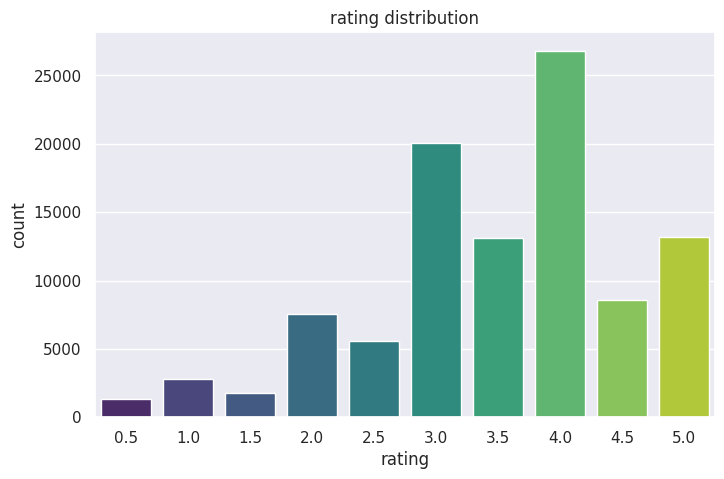

In [ ]:
#Rating distribution
plt.figure(figsize=(8,5))
sns.countplot(data=ratings, x='rating', palette='viridis')
plt.title('rating distribution')
plt.xlabel('rating')
plt.ylabel('count')
plt.show()

In [ ]:
# Average Rating per Movie
movie_stats = ratings.groupby('movieId').agg(avg_rating=('rating', 'mean'),
                                              num_ratings=('rating', 'count')).reset_index()

# Merge with movies
movie_stats = movie_stats.merge(movies, on='movieId')

# Filter movies with at least 100 ratings
top_rated = movie_stats[movie_stats['num_ratings'] >= 100]
top_rated = top_rated.sort_values('avg_rating', ascending=False).head(10)

print("\nTop Rated Movies (min 100 ratings):")
display(top_rated[['title', 'avg_rating', 'num_ratings']])


Top Rated Movies (min 100 ratings):


,title,avg_rating,num_ratings
277,"Shawshank Redemption, The (1994)",4.429022,317
659,"Godfather, The (1972)",4.289062,192
2224,Fight Club (1999),4.272936,218
921,"Godfather: Part II, The (1974)",4.259690,129
6298,"Departed, The (2006)",4.252336,107
913,Goodfellas (1990),4.250000,126
694,Casablanca (1942),4.240000,100
6693,"Dark Knight, The (2008)",4.238255,149
46,"Usual Suspects, The (1995)",4.237745,204
898,"Princess Bride, The (1987)",4.232394,142


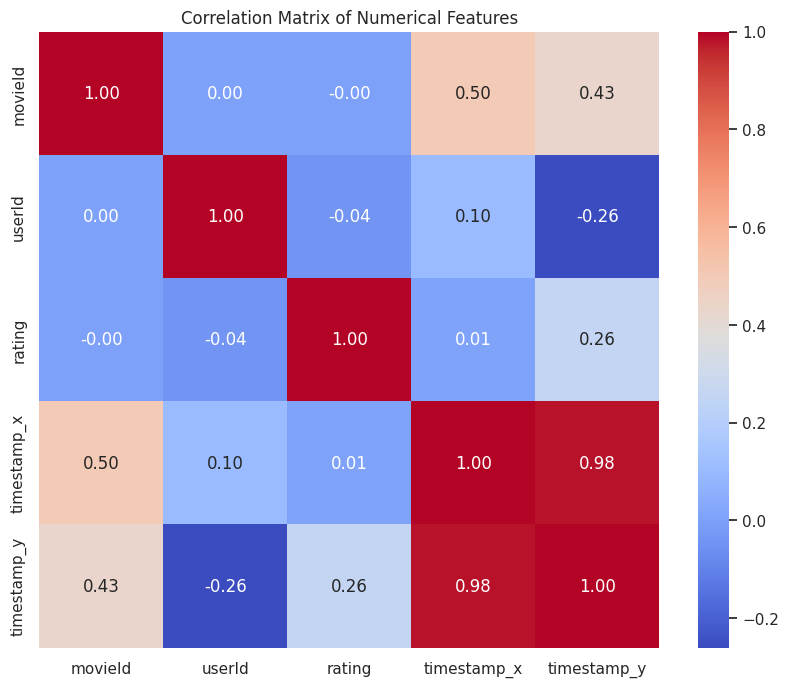

In [ ]:
# Heatmap of Correlation Matrix (if numerical columns exist)
numerical_cols = movie_data.select_dtypes(include=np.number).columns
plt.figure(figsize=(10, 8))
sns.heatmap(movie_data[numerical_cols].corr(), annot=True, palette='viridis', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

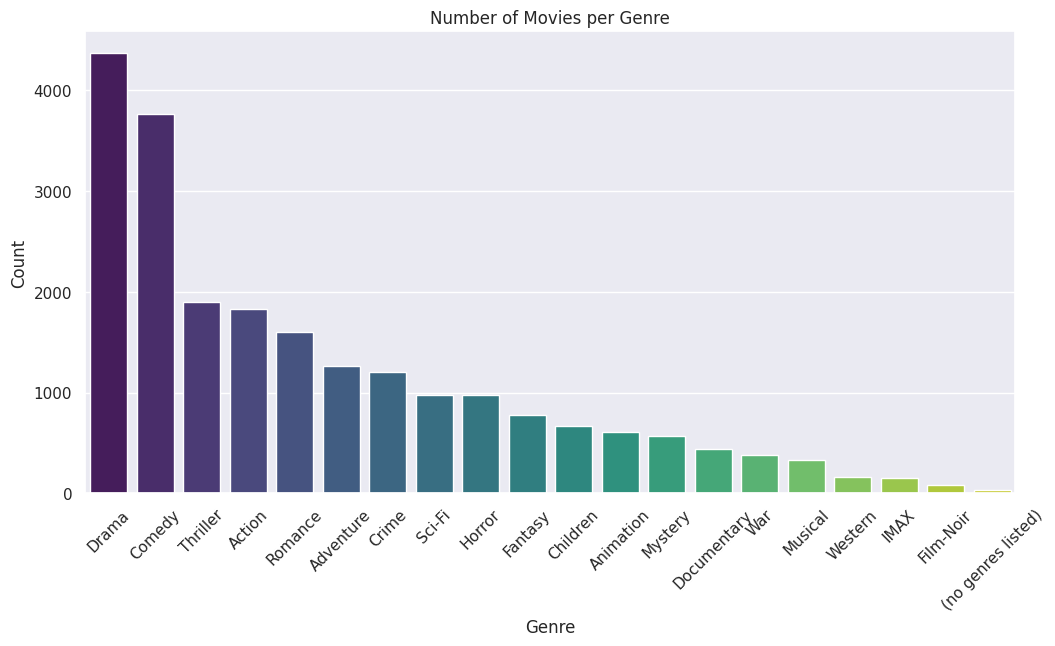

In [ ]:
# Genre Analysis
# Split genres into individual genre rows
genre_counts = movies['genres'].str.split('|').explode().value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

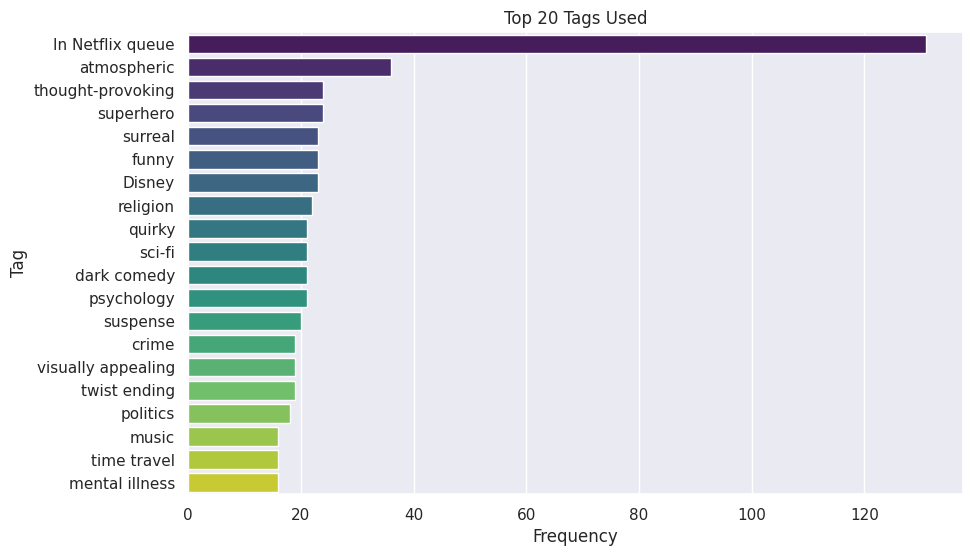

In [ ]:
#Tag Frequency
top_tags = tags['tag'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_tags.values, y=top_tags.index, palette='viridis')
plt.title('Top 20 Tags Used')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.show()


#5.Data Preparation

#Modelling

## A. Collaborative Filtering( Matrix Factorization)

## B. Content-Based Filtering (TF-IDF + Cosine Similarity)

#Evaluation

##A. Collaborative Filtering (RMSE)

##B. Content-Based (Precision@K)

#Deployment